# PA 3: Association Analysis - Apriori Algorithm

## Student Details



Student Name:Karthik Natarajan 


Student ID:1001872904

Team member name and ID:

Angad Tarikere Manjunatha-1001718335

Rishitha Patel-1001863136


## Submission Instructions

Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA3'


Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA3.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA3'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA3'

Step 4: Your submission folder should include ONLY the following files:*   apriory.py,*   lastname_firstname_yourNetID_PA3.ipynb,*   datasets*   toyDS.csv


Step 5: Zip this folder and submit it on canvas Your final submission folder name should be 'lastname_firstname_yourNetID_PA3.ZIP'

## Programming Assignment Details

Before you start:
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Importing Libraries
import pandas as pd
import csv
import sys
import operator

from itertools import chain, combinations
from collections import defaultdict
from optparse import OptionParser


from IPython.display import Image

### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.  Each transaction is at one line with a variable length.  Discard the date attribute (1st attribute) from your dataset.  For example, in your dataset transaction#4 should look like: 
    
    cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


Screenshot of BreadBasket.csv


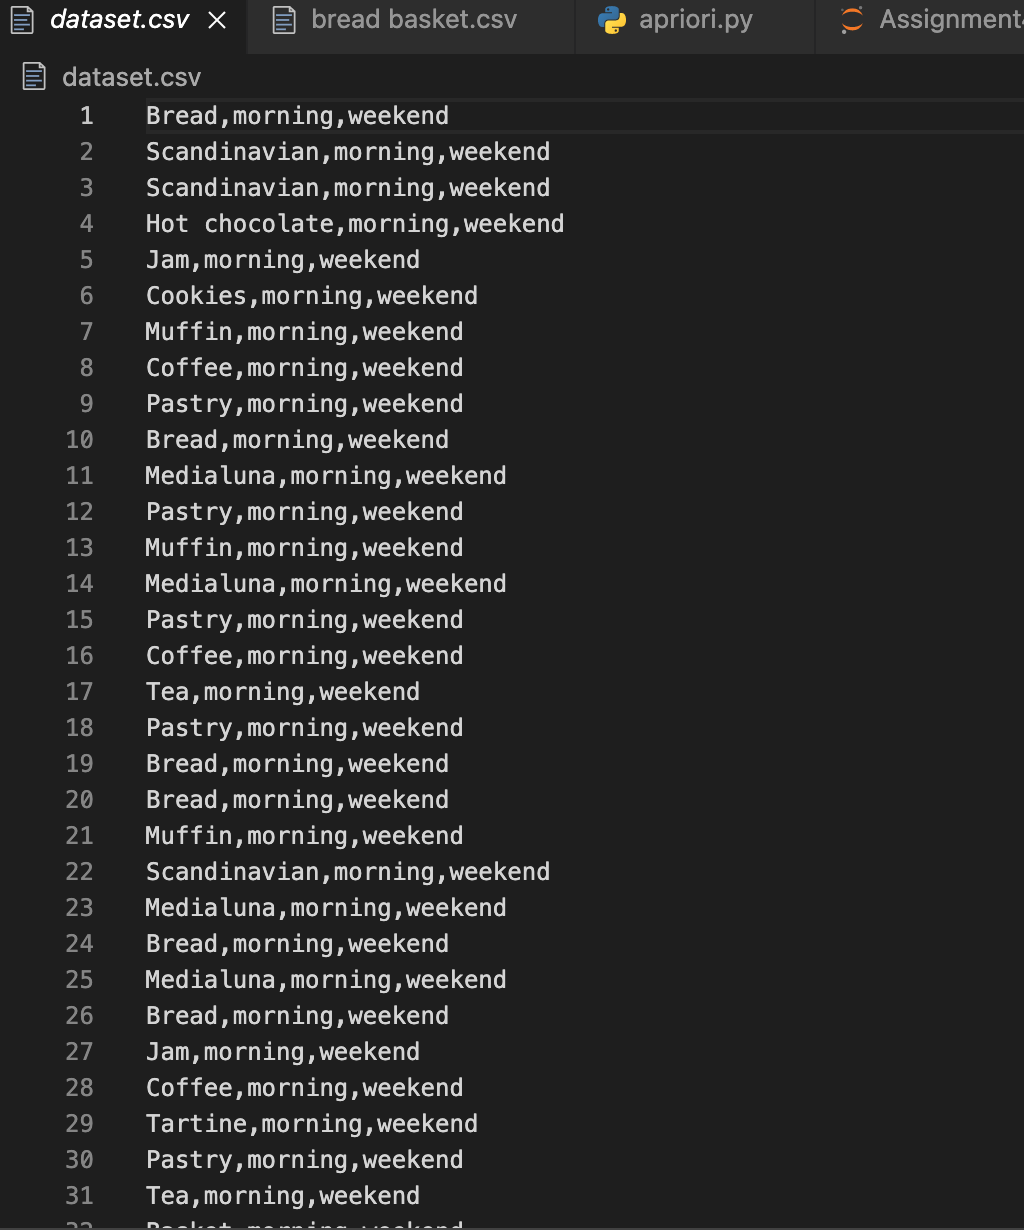

In [3]:
bread_bask=pd.read_csv("bread basket.csv") #reading csv into notebook
print("Screenshot of BreadBasket.csv")
Image("breadbasket.png")


In [4]:
bread_bask= bread_bask.drop(["date_time", "Transaction"], axis=1) #removing multiple columns together

In [5]:
print(bread_bask)

                Item period_day weekday_weekend
0              Bread    morning         weekend
1       Scandinavian    morning         weekend
2       Scandinavian    morning         weekend
3      Hot chocolate    morning         weekend
4                Jam    morning         weekend
...              ...        ...             ...
20502         Coffee  afternoon         weekend
20503            Tea  afternoon         weekend
20504         Coffee  afternoon         weekend
20505         Pastry  afternoon         weekend
20506      Smoothies  afternoon         weekend

[20507 rows x 3 columns]


In [6]:
bread_bask.columns = [''] * len(bread_bask.columns) #deleting column headers

In [7]:
print(bread_bask)


                                        
0              Bread    morning  weekend
1       Scandinavian    morning  weekend
2       Scandinavian    morning  weekend
3      Hot chocolate    morning  weekend
4                Jam    morning  weekend
...              ...        ...      ...
20502         Coffee  afternoon  weekend
20503            Tea  afternoon  weekend
20504         Coffee  afternoon  weekend
20505         Pastry  afternoon  weekend
20506      Smoothies  afternoon  weekend

[20507 rows x 3 columns]


In [8]:
# In this cell we store the dataframe values in the form of lists of lists
records = []
for i in range(0, 20507):
    records.append([str(bread_bask.values[i,j]) 
    for j in range(0, 3)])

In [9]:
print(records)

[['Bread', 'morning', 'weekend'], ['Scandinavian', 'morning', 'weekend'], ['Scandinavian', 'morning', 'weekend'], ['Hot chocolate', 'morning', 'weekend'], ['Jam', 'morning', 'weekend'], ['Cookies', 'morning', 'weekend'], ['Muffin', 'morning', 'weekend'], ['Coffee', 'morning', 'weekend'], ['Pastry', 'morning', 'weekend'], ['Bread', 'morning', 'weekend'], ['Medialuna', 'morning', 'weekend'], ['Pastry', 'morning', 'weekend'], ['Muffin', 'morning', 'weekend'], ['Medialuna', 'morning', 'weekend'], ['Pastry', 'morning', 'weekend'], ['Coffee', 'morning', 'weekend'], ['Tea', 'morning', 'weekend'], ['Pastry', 'morning', 'weekend'], ['Bread', 'morning', 'weekend'], ['Bread', 'morning', 'weekend'], ['Muffin', 'morning', 'weekend'], ['Scandinavian', 'morning', 'weekend'], ['Medialuna', 'morning', 'weekend'], ['Bread', 'morning', 'weekend'], ['Medialuna', 'morning', 'weekend'], ['Bread', 'morning', 'weekend'], ['Jam', 'morning', 'weekend'], ['Coffee', 'morning', 'weekend'], ['Tartine', 'morning', '

In [10]:
df = pd.DataFrame(records) #converting basket.csv into dataframe
df.to_csv (r'dataset.csv', index = False, header=False)

In [11]:
bread_bask.head(8) #printing the first 8 transactions of dataset.csv

0          Bread  morning  weekend
1   Scandinavian  morning  weekend
2   Scandinavian  morning  weekend
3  Hot chocolate  morning  weekend
4            Jam  morning  weekend
5        Cookies  morning  weekend
6         Muffin  morning  weekend
7         Coffee  morning  weekend

### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 


In [12]:
def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])


def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
    """calculates the support for items in the itemSet and returns a subset
    of the itemSet each of whose elements satisfies the minimum support"""
    _itemSet = set()
    localSet = defaultdict(int)

    for item in itemSet:
        for transaction in transactionList:
            if item.issubset(transaction):
                freqSet[item] += 1
                localSet[item] += 1

    for item, count in localSet.items():
        support = float(count) / len(transactionList)

        if support >= minSupport:
            _itemSet.add(item)

    return _itemSet


def joinSet(itemSet, length):
    """Join a set with itself and returns the n-element itemsets"""
    return set(
        [i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length]
    )


def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))  # Generate 1-itemSets
    return itemSet, transactionList


def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet)

    currentLSet = oneCSet
    k = 2
    while currentLSet != set([]):
        largeSet[k - 1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(
            currentLSet, transactionList, minSupport, freqSet
        )
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
        """local function which Returns the support of an item"""
        return float(freqSet[item]) / len(transactionList)

    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item)) for item in value])

    toRetRules = []
    for key, value in list(largeSet.items())[1:]:
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item) / getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((tuple(element), tuple(remain)), confidence))
    return toRetItems, toRetRules


def printResults(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item, support in sorted(items, key=lambda x: x[1]):
        print("item: %s , %.3f" % (str(item), support))
    print("\n------------------------ RULES:")
    for rule, confidence in sorted(rules, key=lambda x: x[1]):
        pre, post = rule
        print("Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence))


def to_str_results(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    i, r = [], []
    for item, support in sorted(items, key=lambda x: x[1]):
        x = "item: %s , %.3f" % (str(item), support)
        i.append(x)

    for rule, confidence in sorted(rules, key=lambda x: x[1]):
        pre, post = rule
        x = "Rule: %s ==> %s , %.3f" % (str(pre), str(post), confidence)
        r.append(x)

    return i, r


def dataFromFile(fname):
    """Function which reads from the file and yields a generator"""
    with open(fname, "rU") as file_iter:
        for line in file_iter:
            line = line.strip().rstrip(",")  # Remove trailing comma
            record = frozenset(line.split(","))
            yield record


if __name__ == "__main__":

   

    
    items, rules = runApriori(records, 0.0045, 0.2)

    printResults(items, rules)

item: ('afternoon', 'Tiffin') , 0.005
item: ('Chicken Stew', 'weekday') , 0.005
item: ('Sandwich', 'morning') , 0.005
item: ('afternoon', 'Hearty & Seasonal') , 0.005
item: ('Fudge', 'weekday') , 0.005
item: ('Baguette', 'weekday') , 0.005
item: ('Salad',) , 0.005
item: ('afternoon', 'weekend', 'Alfajores') , 0.005
item: ('afternoon', 'Truffles', 'weekday') , 0.005
item: ('weekend', 'Spanish Brunch') , 0.005
item: ('Scone', 'afternoon', 'weekday') , 0.005
item: ('afternoon', 'Coke', 'weekday') , 0.005
item: ('weekend', 'morning', 'Hot chocolate') , 0.005
item: ('Farm House', 'afternoon', 'weekday') , 0.005
item: ('Hearty & Seasonal',) , 0.005
item: ('Alfajores', 'morning') , 0.005
item: ('Scone', 'morning') , 0.005
item: ('Brownie', 'afternoon', 'weekend') , 0.005
item: ('afternoon', 'Mineral water') , 0.005
item: ('Cake', 'weekend', 'morning') , 0.005
item: ('Scone', 'afternoon', 'weekend') , 0.005
item: ('afternoon', 'Toast') , 0.006
item: ('afternoon', 'Chicken Stew') , 0.006
item: 

In [13]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=30% and minimum confidence=35%)')
print ('Case 1 Reasoning:\nApriori depends up on two values- support and confidence \nsupport means in how many number of transaction a particular item is present out of all transactions\nand if the item qualifies for minimum support it goes to frequent items\nconfidence shows how two or more items dependent on each other')
print('\nIn this case: minimum support is 30% and min-confidence is 35%')
print('The minimum confidence is 35% which means that, in a x->y rule, if x item set is already in the basket, there is 35% min-chance that y item set is also added to the basket.')
print ('Case 1 Output:')
if __name__ == "__main__":

   

    
    items, rules = runApriori(records, 0.30, 0.35)

    printResults(items, rules)
#

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=30% and minimum confidence=35%)
Case 1 Reasoning:
Apriori depends up on two values- support and confidence 
support means in how many number of transaction a particular item is present out of all transactions
and if the item qualifies for minimum support it goes to frequent items
confidence shows how two or more items dependent on each other

In this case: minimum support is 30% and min-confidence is 35%
The minimum confidence is 35% which means that, in a x->y rule, if x item set is already in the basket, there is 35% min-chance that y item set is also added to the basket.
Case 1 Output:
item: ('afternoon', 'weekday') , 0.355
item: ('weekend',) , 0.375
item: ('morning',) , 0.410
item: ('afternoon',) , 0.564
item: ('weekday',) , 0.625

------------------------ RULES:
Rule: ('weekday',) ==> ('afternoon',) , 0.568
Rule: ('afternoon',) ==> ('weekday',) , 0.629


In [14]:
print ( 'Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=20% and minimum confidence=40%)') 
print ('Case 2 Reasoning:\nAs the minimum support is decreased compared to before case by which more number frequent items gets selected\nand as the confidence values increased the accuracy of the data increases')
print('The min-confidence is 40% which means that, in a x->y rule, if x item set is already in the basket then there is 40% min-chance that y item set is also added to the basket.\n')
print ('Case 2 Output:') 
if __name__ == "__main__":

   

    
    items, rules = runApriori(records, 0.20, 0.40)

    printResults(items, rules)

Case:2 # # # # # # # # #
Case 2 (minimum support=20% and minimum confidence=40%)
Case 2 Reasoning:
As the minimum support is decreased compared to before case by which more number frequent items gets selected
and as the confidence values increased the accuracy of the data increases
The min-confidence is 40% which means that, in a x->y rule, if x item set is already in the basket then there is 40% min-chance that y item set is also added to the basket.

Case 2 Output:
item: ('afternoon', 'weekend') , 0.209
item: ('morning', 'weekday') , 0.252
item: ('Coffee',) , 0.267
item: ('afternoon', 'weekday') , 0.355
item: ('weekend',) , 0.375
item: ('morning',) , 0.410
item: ('afternoon',) , 0.564
item: ('weekday',) , 0.625

------------------------ RULES:
Rule: ('weekday',) ==> ('morning',) , 0.404
Rule: ('weekend',) ==> ('afternoon',) , 0.558
Rule: ('weekday',) ==> ('afternoon',) , 0.568
Rule: ('morning',) ==> ('weekday',) , 0.616
Rule: ('afternoon',) ==> ('weekday',) , 0.629


In [15]:
print (' Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=12% and minimum confidence=50%)')
print ('Case 3 Reasoning:\nIn this minimum support value is decreased further to 12% and minimum confidence is increased to 50%.')
print('As the support values is 12% more number of frequent items gets selected compared to case 1 and case2 \n and as the confidence is 50% if one item is in the basket the other item has 50% minimum chance getting\npicked by the customer')
print('We can say that as the confidence value increases, the number of rules decreases and vice versa.In this\ncase, The probability of the item Y being chosen when the item X selected is high.')
print ('Case 3 Output:')
if __name__ == "__main__":

   

    
    items, rules = runApriori(records, 0.12, 0.50)

    printResults(items, rules)

 Case:3 # # # # # # # # #
Case 3 (minimum support=12% and minimum confidence=50%)
Case 3 Reasoning:
In this minimum support value is decreased further to 12% and minimum confidence is increased to 50%.
As the support values is 12% more number of frequent items gets selected compared to case 1 and case2 
 and as the confidence is 50% if one item is in the basket the other item has 50% minimum chance getting
picked by the customer
We can say that as the confidence value increases, the number of rules decreases and vice versa.In this
case, The probability of the item Y being chosen when the item X selected is high.
Case 3 Output:
item: ('Coffee', 'morning') , 0.125
item: ('afternoon', 'Coffee') , 0.138
item: ('weekend', 'morning') , 0.158
item: ('Bread',) , 0.162
item: ('Coffee', 'weekday') , 0.173
item: ('afternoon', 'weekend') , 0.209
item: ('morning', 'weekday') , 0.252
item: ('Coffee',) , 0.267
item: ('afternoon', 'weekday') , 0.355
item: ('weekend',) , 0.375
item: ('morning',) , 0.41

# References

[01]  https://www.kaggle.com/acostasg/random-shopping-cart 

(https://www.kaggle.com/acostasg/random-shopping-cart)

[02]  ttps://github.com/asaini/Apriori (https://github.com/asaini/Apriori)

# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriory.py
* [30 points] - Evaluate Results 
